**Artificial Neural Networks - Classification**

An Artificial Neural Network (ANN) is a type of machine learning algorithm that is inspired by the structure and function of the human brain. It consists of multiple layers of interconnected nodes, or "neurons", that process and transmit information. By training an ANN on a dataset, it can learn to recognise patterns and make predictions on new data. ANNs are commonly used for tasks such as image recognition, NLP, and predictive modelling. 
In this lab, you will get exposed to customer loyalty score prediction using ANN. 

1. Import/install the necessary packages
2. Get the data from Google Drive
3. Calculate summary statistics for categorical data
4. Drop unnecessary features
5. Missing Data: Fill missing values with the mean for numerical columns
6. Missing Data: Fill missing values with the mode for categorical columns
7. Calculate summary statistics for categorical data
8. Display a box plot for Customer Age
9. Removing Outliers: To remove outliers, use a method like Z-score or IQR to detect and remove the extreme values
10. Display the box plot again
11. Convert the categorical variables to dummy variables
12. Standardisation
13. Split the data into training and test sets (80:20)
14. Import/install the necessary packages
15. Model architecture and creation
16. Find the best parameters using grid search
17. Fit the model with the best hyperparameters and make predictions using the test set
18. Print the confusion matrix and performance metrics (classification report)
19. Display Feature Importance

**Import/install the necessary packages**

In [157]:
import pandas as pd

**Get the data from Google Drive**

In [158]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/customer_loyalty_class_data.csv") 
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   purchase_frequency          900 non-null    float64
 1   avg_order_value             900 non-null    float64
 2   customer_satisfaction       900 non-null    float64
 3   customer_age                901 non-null    float64
 4   customer_gender             900 non-null    object 
 5   net_promoter_score          900 non-null    float64
 6   engagement_level            900 non-null    object 
 7   loyalty_program_membership  998 non-null    object 
 8   age_group                   884 non-null    object 
 9   customer_loyalty_score      1000 non-null   int64  
 10  customer_loyalty_class      1000 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB
None 

   purchase_frequency  avg_order_value  customer_satisfaction  customer_age  \
0   

**Calculate summary statistics for categorical data**

In [159]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

customer_gender:
male      478
female    422
Name: customer_gender, dtype: int64

engagement_level:
low       313
high      298
medium    289
Name: engagement_level, dtype: int64

loyalty_program_membership:
NO     541
YES    457
Name: loyalty_program_membership, dtype: int64

age_group:
46-55    177
26-35    172
56-65    169
36-45    168
18-25    134
66-70     64
Name: age_group, dtype: int64

customer_loyalty_class:
NonLoyal    676
Loyal       324
Name: customer_loyalty_class, dtype: int64



**Drop unnecessary features**

In [160]:
df.drop(['age_group','customer_loyalty_score'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   purchase_frequency          900 non-null    float64
 1   avg_order_value             900 non-null    float64
 2   customer_satisfaction       900 non-null    float64
 3   customer_age                901 non-null    float64
 4   customer_gender             900 non-null    object 
 5   net_promoter_score          900 non-null    float64
 6   engagement_level            900 non-null    object 
 7   loyalty_program_membership  998 non-null    object 
 8   customer_loyalty_class      1000 non-null   object 
dtypes: float64(5), object(4)
memory usage: 70.4+ KB


**Missing Data:  Fill missing values with the mean for numerical columns**

In [161]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
    
print(df.describe(),'\n')

       purchase_frequency  avg_order_value  customer_satisfaction  \
count         1000.000000      1000.000000            1000.000000   
mean             5.610000       143.027778               5.400000   
std              2.760386        68.531532               2.782399   
min              1.000000        25.000000               1.000000   
25%              3.000000       100.000000               3.000000   
50%              5.610000       143.027778               5.400000   
75%              8.000000       200.000000               8.000000   
max             10.000000       250.000000              10.000000   

       customer_age  net_promoter_score  
count   1000.000000         1000.000000  
mean      43.677026            5.031111  
std       14.375314            2.969503  
min       18.000000            0.000000  
25%       32.000000            3.000000  
50%       43.677026            5.031111  
75%       55.000000            7.000000  
max      102.000000           10.000000   

**Missing Data: Fill missing values with the mode for categorical columns**

In [162]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

**Calculate summary statistics for categorical data**

In [163]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

customer_gender:
male      578
female    422
Name: customer_gender, dtype: int64

engagement_level:
low       413
high      298
medium    289
Name: engagement_level, dtype: int64

loyalty_program_membership:
NO     543
YES    457
Name: loyalty_program_membership, dtype: int64

customer_loyalty_class:
NonLoyal    676
Loyal       324
Name: customer_loyalty_class, dtype: int64



**Display a box plot for Customer Age**

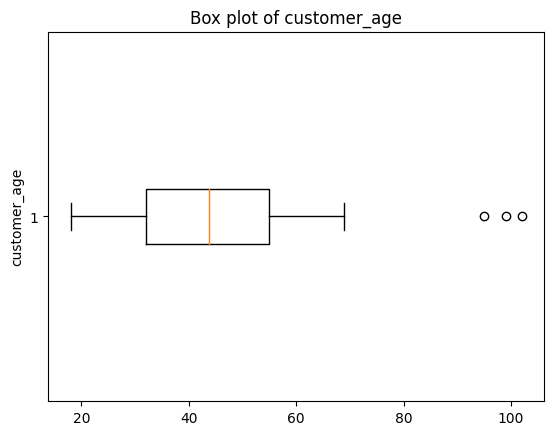

count    1000.000000
mean       43.677026
std        14.375314
min        18.000000
25%        32.000000
50%        43.677026
75%        55.000000
max       102.000000
Name: customer_age, dtype: float64 



In [164]:
import matplotlib.pyplot as plt

plt.boxplot(df['customer_age'],vert=False)
plt.title('Box plot of customer_age')
plt.ylabel('customer_age')
plt.show()
print(df.customer_age.describe(),'\n')

** Removing Outliers:
To remove outliers, use a method like Z-score or IQR to detect and remove the extreme values. **

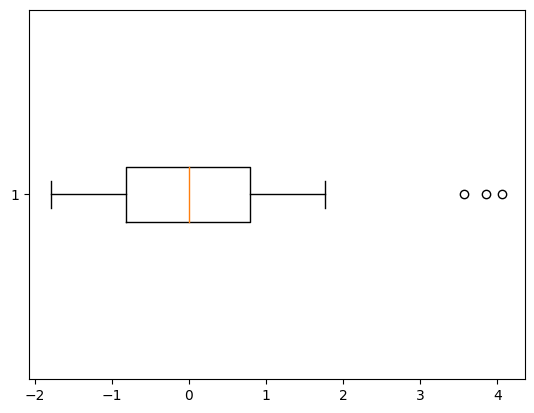

In [165]:
from scipy import stats

# Calculate Z-score for customer_age column
z_scores = stats.zscore(df['customer_age'])
plt.boxplot(z_scores,vert=False)

# Reatin rows with Z-score greater than -3 or less than +3
df = df[(z_scores >= -3) & (z_scores <= 3)]


**Display the box plot again**

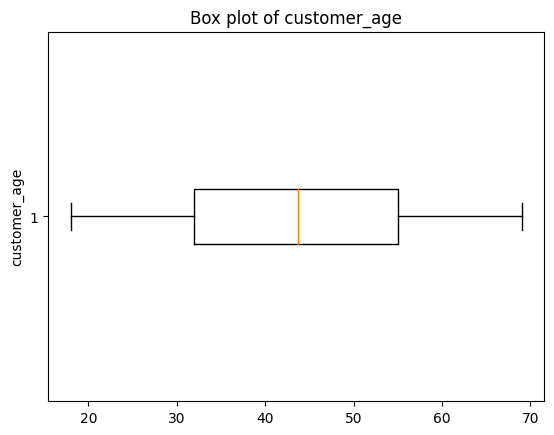

count    997.000000
mean      43.511560
std       14.075224
min       18.000000
25%       32.000000
50%       43.677026
75%       55.000000
max       69.000000
Name: customer_age, dtype: float64 



In [166]:
plt.boxplot(df['customer_age'],vert=False)
plt.title('Box plot of customer_age')
plt.ylabel('customer_age')
plt.show()
print(df.customer_age.describe(),'\n')

In [167]:
print(df.describe(),'\n')

       purchase_frequency  avg_order_value  customer_satisfaction  \
count          997.000000       997.000000             997.000000   
mean             5.610832       142.988716               5.400201   
std              2.759288        68.608531               2.780331   
min              1.000000        25.000000               1.000000   
25%              3.000000       100.000000               3.000000   
50%              5.610000       143.027778               5.400000   
75%              8.000000       200.000000               8.000000   
max             10.000000       250.000000              10.000000   

       customer_age  net_promoter_score  
count    997.000000          997.000000  
mean      43.511560            5.034214  
std       14.075224            2.966332  
min       18.000000            0.000000  
25%       32.000000            3.000000  
50%       43.677026            5.031111  
75%       55.000000            7.000000  
max       69.000000           10.000000   

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 996
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   purchase_frequency          997 non-null    float64
 1   avg_order_value             997 non-null    float64
 2   customer_satisfaction       997 non-null    float64
 3   customer_age                997 non-null    float64
 4   customer_gender             997 non-null    object 
 5   net_promoter_score          997 non-null    float64
 6   engagement_level            997 non-null    object 
 7   loyalty_program_membership  997 non-null    object 
 8   customer_loyalty_class      997 non-null    object 
dtypes: float64(5), object(4)
memory usage: 77.9+ KB


**Convert the categorical variables to dummy variables**

In [169]:
df = pd.get_dummies(df, drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 996
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   purchase_frequency               997 non-null    float64
 1   avg_order_value                  997 non-null    float64
 2   customer_satisfaction            997 non-null    float64
 3   customer_age                     997 non-null    float64
 4   net_promoter_score               997 non-null    float64
 5   customer_gender_female           997 non-null    uint8  
 6   customer_gender_male             997 non-null    uint8  
 7   engagement_level_high            997 non-null    uint8  
 8   engagement_level_low             997 non-null    uint8  
 9   engagement_level_medium          997 non-null    uint8  
 10  loyalty_program_membership_NO    997 non-null    uint8  
 11  loyalty_program_membership_YES   997 non-null    uint8  
 12  customer_loyalty_class

In [170]:
print(df.columns)
print(df.describe())

Index(['purchase_frequency', 'avg_order_value', 'customer_satisfaction',
       'customer_age', 'net_promoter_score', 'customer_gender_female',
       'customer_gender_male', 'engagement_level_high', 'engagement_level_low',
       'engagement_level_medium', 'loyalty_program_membership_NO',
       'loyalty_program_membership_YES', 'customer_loyalty_class_Loyal',
       'customer_loyalty_class_NonLoyal'],
      dtype='object')
       purchase_frequency  avg_order_value  customer_satisfaction  \
count          997.000000       997.000000             997.000000   
mean             5.610832       142.988716               5.400201   
std              2.759288        68.608531               2.780331   
min              1.000000        25.000000               1.000000   
25%              3.000000       100.000000               3.000000   
50%              5.610000       143.027778               5.400000   
75%              8.000000       200.000000               8.000000   
max             10.

**Standardisation**

In [171]:
from sklearn.preprocessing import StandardScaler
  
# Separate the dummy variables from the numerical variables
dummy_cols = df.select_dtypes(include='uint8').columns
num_cols = list(set(df.select_dtypes(include=['float64', 'int64']).columns) - set(dummy_cols))

# Standardize the numerical variables
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Combine the standardized numerical variables with the dummy variables
df_std = pd.concat([df[num_cols], df[dummy_cols]], axis=1)

print(df_std.head(5),'\n')
print(df_std.describe(),'\n')

   customer_satisfaction  net_promoter_score  customer_age  avg_order_value  \
0              -0.503862           -1.023397     -1.102600        -1.356032   
1              -0.144012           -1.697969      0.319049        -0.262325   
2              -1.583412           -0.011540     -1.173683         0.000570   
3              -1.583412            1.337604      1.598534        -1.356032   
4               0.935538           -1.360683      1.527452        -0.262325   

   purchase_frequency  customer_gender_female  customer_gender_male  \
0           -1.671862                       1                     0   
1           -0.584079                       1                     0   
2            0.503704                       0                     1   
3           -0.221484                       1                     0   
4           -0.000302                       0                     1   

   engagement_level_high  engagement_level_low  engagement_level_medium  \
0                      

**Split the data into training and test sets (80:20)**

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_std.drop(['customer_loyalty_class_Loyal',
       'customer_loyalty_class_NonLoyal'], axis=1), df_std[['customer_loyalty_class_Loyal']], test_size=0.2, random_state=50)
y_test.shape

(200, 1)

**Import/install the necessary packages**

In [173]:
!pip install scikeras
import scikeras as sk
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
#from scikeras.wrappers import KerasRegressor
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Model architecture and creation**

In [174]:
# define model architecture
def create_model_classification(optimizer='adam'):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# create the model
model = KerasClassifier(build_fn=create_model_classification, verbose=0)
print(model)

KerasClassifier(
	model=None
	build_fn=<function create_model_classification at 0x7fce24cc0f70>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)


**Find the best parameters using grid search**

In [175]:
from sklearn.metrics import accuracy_score, make_scorer

# Define the scoring metric as accuracy
scorer = make_scorer(accuracy_score)

# Define the grid search parameters
param_grid = {'batch_size': [32, 64],
              'epochs': [50, 100]
             }

# Perform grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring=scorer)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_result.best_params_}")

/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Best Parameters: {'batch_size': 32, 'epochs': 100}


**Fit the model with the best hyperparameters and make predictions using the test set**

In [176]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train, epochs=grid.best_params_['epochs'], batch_size=grid.best_params_['batch_size'], verbose=0, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

y_pred = best_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


**Print the confusion matrix and performance metrics (classification report)**

In [177]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[123  11]
 [ 16  50]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       134
           1       0.82      0.76      0.79        66

    accuracy                           0.86       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.86      0.86      0.86       200



**Display Feature Importance**

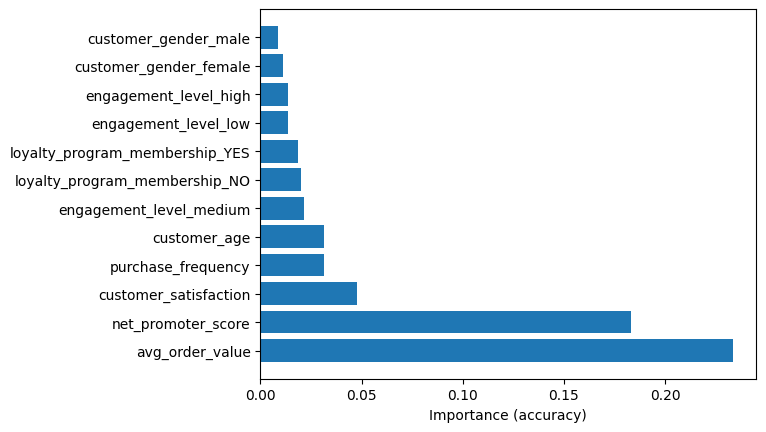

In [178]:
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def permutation_feature_importance(model, X, y, metric='accuracy', num_permutations=1000):
    baseline_score = model.score(X, y)
    feature_importances = []
    for feature in X.columns:
        X_permuted = X.copy()
        X_permuted[feature] = np.random.permutation(X_permuted[feature])
        permuted_score = model.score(X_permuted, y)
        feature_importances.append(baseline_score - permuted_score)
    sorted_importances = sorted(zip(feature_importances, X.columns), reverse=True)
    importances, features = zip(*sorted_importances)
    plt.barh(features, importances)
    plt.xlabel(f"Importance ({metric})")
    plt.show()

permutation_feature_importance(best_model, X_train, y_train)


A positive value indicates that the feature is important for the model's performance, while a negative value indicates that the feature is not important, or even harmful, for the model's performance.



**Exercise 1**

Use the following hyperparameter snippet for the tuning:

In [179]:
param_grid = {'batch_size': [32, 64, 128],
              'epochs': [50, 100, 150],
              }